In [1]:
# common libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# read the dataset
df = pd.read_csv('iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# get the unique values
target_values = df[4].unique()
target_values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
mappings = dict(zip(target_values, range(3)))
mappings 

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
# map the values (Neural Nets needs numbers not strings)
df[4] = df[4].map(mappings)

In [6]:
df.loc[:, :3].head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# transform dataset to features and targets (80% train, 20% test)
features = df.loc[:, :3]
target = df[4]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target) 

In [8]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(axis=-1), # normalize (fit dat from 0-1 values)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [9]:
# fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8)

Epoch 1/20


15/15 [==============================] - 1s 3ms/step - loss: 1.1015 - accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.7583
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.8000
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8250
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.7667
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8000
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8083
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8250
Epoch 9/20
15/15 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8667
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8583
Epoch 11/20
15/15

In [10]:
history.history

{'loss': [1.1014788150787354,
  0.6762135624885559,
  0.5626814961433411,
  0.4517975449562073,
  0.41860681772232056,
  0.42442601919174194,
  0.3710135519504547,
  0.36774685978889465,
  0.3393229842185974,
  0.3082130253314972,
  0.31560957431793213,
  0.2874811887741089,
  0.2517092525959015,
  0.2571708858013153,
  0.23410794138908386,
  0.20508025586605072,
  0.19255892932415009,
  0.1734524369239807,
  0.18348261713981628,
  0.1882285326719284],
 'accuracy': [0.46666666865348816,
  0.7583333253860474,
  0.800000011920929,
  0.824999988079071,
  0.7666666507720947,
  0.800000011920929,
  0.8083333373069763,
  0.824999988079071,
  0.8666666746139526,
  0.8583333492279053,
  0.8666666746139526,
  0.875,
  0.9416666626930237,
  0.8999999761581421,
  0.8999999761581421,
  0.925000011920929,
  0.9333333373069763,
  0.9583333134651184,
  0.9333333373069763,
  0.9416666626930237]}

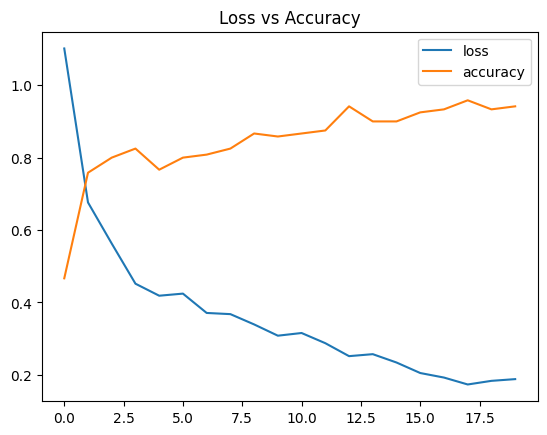

In [11]:
# plot to see the loss (decrease) and accuracy (increase)
pd.DataFrame(history.history).plot(kind='line')
plt.title('Loss vs Accuracy');

In [12]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 126ms/step


array([[9.98431385e-01, 1.56839832e-03, 1.80284729e-07],
       [1.08897857e-05, 8.24413300e-01, 1.75575852e-01],
       [9.97423053e-01, 2.57642544e-03, 5.58559861e-07],
       [6.23058183e-09, 3.41073930e-01, 6.58926010e-01],
       [1.31766171e-08, 1.27567351e-01, 8.72432709e-01],
       [2.24363335e-04, 9.44582880e-01, 5.51927574e-02],
       [1.50178280e-03, 9.35320258e-01, 6.31779432e-02],
       [1.88460705e-04, 9.15437639e-01, 8.43739361e-02],
       [9.97558832e-01, 2.44050799e-03, 5.48706680e-07],
       [9.98942196e-01, 1.05780375e-03, 5.86619961e-08],
       [2.21542855e-08, 2.26671845e-01, 7.73328185e-01],
       [2.20674352e-04, 9.27960277e-01, 7.18190670e-02],
       [5.31002763e-04, 9.38405335e-01, 6.10636733e-02],
       [9.98361766e-01, 1.63794227e-03, 1.80711410e-07],
       [1.55151865e-05, 7.12509871e-01, 2.87474573e-01],
       [1.41032214e-10, 5.31587601e-02, 9.46841240e-01],
       [1.28652838e-10, 1.07298642e-01, 8.92701387e-01],
       [2.70114342e-05, 7.69195

In [13]:
#{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predictions = np.argmax(y_pred, axis=1)
predictions

array([0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2,
       0, 0, 1, 0, 0, 2, 2, 1], dtype=int64)

In [14]:
np.reshape(y_test, (1, -1))

array([[0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2,
        0, 0, 1, 0, 0, 2, 2, 1]], dtype=int64)

In [15]:
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

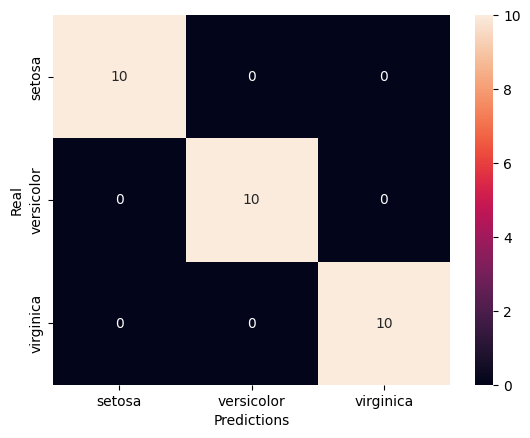

In [16]:
labels = ['setosa', 'versicolor', 'virginica']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Real');

In [17]:
model.evaluate(X_test, y_test);

1/1 [==============================] - 0s 212ms/step - loss: 0.1077 - accuracy: 1.0000


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

